In [91]:
import numpy as np
import scipy
import neurolib.utils.functions as func
import matplotlib.pyplot as plt
from neurolib.models.aln import ALNModel
from scipy import signal
from neurolib.optimize.evolution import Evolution
from neurolib.utils.parameterSpace import ParameterSpace

# The ALNModel

Below is a detailed and user-friendly documentation for the `ALNModel` class, which is a multi-population mean-field model designed to simulate the dynamics of excitatory and inhibitory neurons in different populations.

### **ALNModel Class Documentation**

#### **Overview**
The `ALNModel` (Adaptive Linear-Nonlinear Model) is a computational neuroscience model that simulates the dynamics of networks of excitatory and inhibitory neurons. This model is particularly designed to handle large-scale brain networks where each node represents a population of neurons. The model uses a mean-field approach to describe the collective activity of these neurons.


### **Synaptic Parameters**
These parameters define the post-synaptic current (PSC) amplitudes and coupling strengths.

#### PSC Amplitudes (cee, cie, cei, cii):
- **`cee`, `cie`, `cei`, `cii`**: PSC amplitudes for different types of synapses.
  - **Defaults**:
    - `cee = 0.3 mV/ms` (Excitatory-to-Excitatory)
    - `cie = 0.3 mV/ms` (Inhibitory-to-Excitatory)
    - `cei = 0.5 mV/ms` (Excitatory-to-Inhibitory)
    - `cii = 0.5 mV/ms` (Inhibitory-to-Inhibitory)
1. Biological Relevance:
   These parameters represent the strength of postsynaptic currents (PSCs) at different types of synapses. In biological neurons, PSCs are the currents that flow into a neuron when neurotransmitters bind to receptors on the postsynaptic membrane.

2. Detailed Explanation:
   - cee (Excitatory-to-Excitatory): Represents the strength of glutamatergic synapses between pyramidal neurons in cortical networks.
   - cie (Inhibitory-to-Excitatory): Represents the strength of GABAergic synapses from interneurons onto pyramidal cells.
   - cei (Excitatory-to-Inhibitory): Represents the strength of glutamatergic synapses from pyramidal cells onto interneurons.
   - cii (Inhibitory-to-Inhibitory): Represents the strength of GABAergic synapses between interneurons.

3. Units and Scaling:
   The units mV/ms can be interpreted as the rate of change of the membrane potential due to synaptic input. Higher values indicate stronger synaptic effects.

4. Network Implications:
   - The relative values of these parameters greatly influence the balance of excitation and inhibition in the network.
   - The fact that cei and cii are larger than cee and cie in the default settings suggests that synapses onto inhibitory neurons are stronger, which could lead to more responsive inhibitory control.

#### Maximum Coupling Strengths (Jee_max, Jie_max, Jei_max, Jii_max):
- **`Jee_max`, `Jie_max`, `Jei_max`, `Jii_max`**: Maximum coupling strengths used in simulations.
  - **Defaults**:
    - `Jee_max = 2.43 mV/ms`
    - `Jie_max = 2.60 mV/ms`
    - `Jei_max = -3.3 mV/ms`
    - `Jii_max = -1.64 mV/ms`
1. Biological Relevance:
   These parameters represent the maximum synaptic strengths in the network. Biologically, they correspond to the total synaptic weight when all synapses of a particular type are active.

2. Detailed Explanation:
   - Jee_max: Maximum strength of recurrent excitation within the excitatory population.
   - Jie_max: Maximum strength of excitatory input to the inhibitory population.
   - Jei_max: Maximum strength of inhibitory input to the excitatory population (note the negative value).
   - Jii_max: Maximum strength of recurrent inhibition within the inhibitory population (note the negative value).

3. Units and Scaling:
   Like the PSC amplitudes, these are in mV/ms. The absolute values indicate the maximum rate of change of membrane potential due to synaptic input when all synapses are active.

4. Network Implications:
   - Jee_max > 0: Allows for self-sustaining activity in the excitatory population.
   - Jie_max > 0: Enables feedforward inhibition, where excitatory activity recruits inhibitory neurons.
   - Jei_max < 0: Provides feedback inhibition, allowing inhibitory neurons to suppress excitatory activity.
   - Jii_max < 0: Enables inhibitory neurons to regulate each other's activity.

5. Biological Constraints:
   - The values should reflect the relative numbers of each neuron type and their connectivity patterns in cortical circuits.
   - Typically, |Jei_max| > |Jii_max| because pyramidal cells often receive stronger inhibition than interneurons.


### Instantiate model


In [92]:
# Load structural connectivity matrices
sub = '002'

weights_file = f"/Users/fdjim/Desktop/Projects/neurolib/data/sub-0{sub}/sc/0{sub}_1_Counts.csv"
length_file = f"/Users/fdjim/Desktop/Projects/neurolib/data/sub-0{sub}/sc/0{sub}_1_Lengths.csv" 

weights = np.loadtxt(weights_file, delimiter=',')
length = np.loadtxt(length_file, delimiter=',')

# Normalize each connectome matrix
normalized_weights = weights / np.max(weights)
normalized_length = length / np.max(length)

model = ALNModel(Cmat=normalized_weights, Dmat=length)

In [93]:
# Set model parameters

model.params['duration'] = 1000 * 10  # ms
model.params['mue_ext_mean'] = 3.87689724
model.params['mui_ext_mean'] = 2.5457993
model.params['sigma_ou'] = 0.25439445
model.params['b'] = 23.18191895
model.params['a'] = 33.75627605


# model.params.sigma_ou = 0.19
# model.params.mue_ext_mean = 1.63  # mV/ms (default is 0.4)
# model.params.mui_ext_mean = 0.05 # mV/ms (default is 0.3)
# model.params.b = 24  # pA
# model.params.b = 28 # nS


# model.params.cee = 0.3  # mV/ms (default 0.3)
# model.params.cei = 0.5  # mV/ms (default 0.5)
# model.params.cie = 0.3  # mV/ms (default 0.3)
# model.params.cii = 0.5  # mV/ms (default 0.5)

# model.params.Jei_max = -3.3  # mV/ms [0-(-10)]
# model.params.Jii_max = -3  # mV/ms (default is -1.64)
# model.params.Jee_max = 3  # mV/ms (default is 2.43)
# model.params.Jie_max = 2.6  # mV/ms (default is 2.60)

model.run()
# model.run(chunkwise=True)

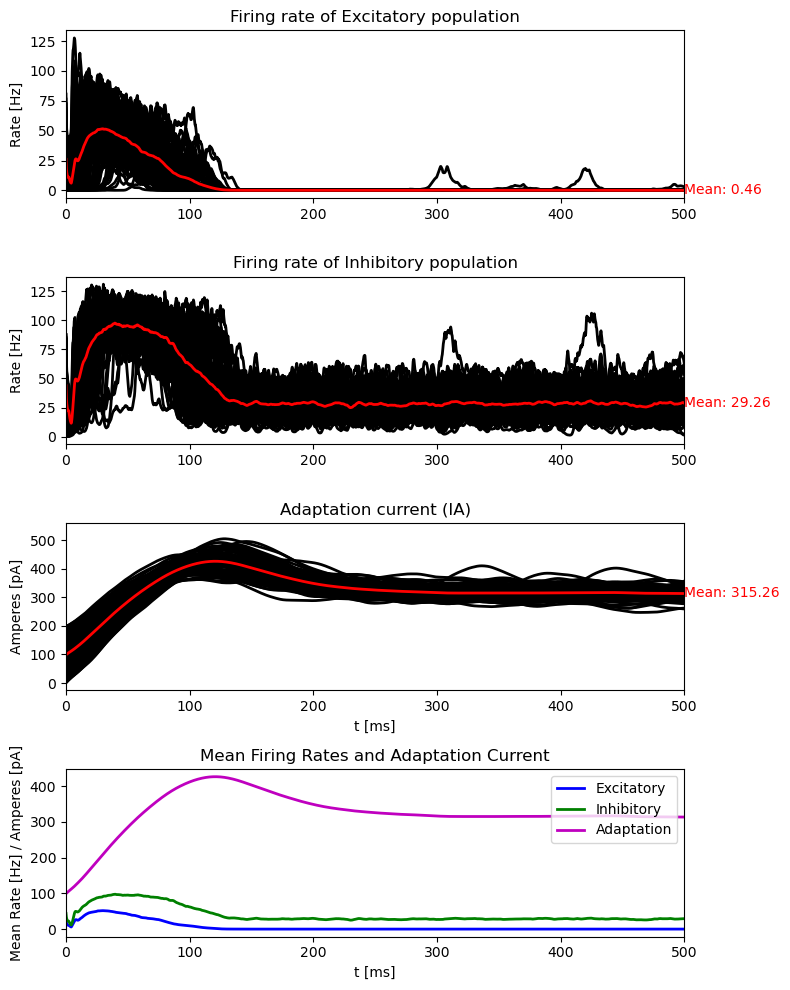

Model Parameters:
sigma_ou: 0.25439445
mue_ext_mean: 3.87689724
mui_ext_mean: 2.5457993
cee: 0.3
cei: 0.5
cie: 0.3
cii: 0.5
Jei_max: -3.3
Jii_max: -1.64
Jee_max: 2.43
Jie_max: 2.6


In [94]:
time_span = [0, 500]  # ms
# freq_span = [0, 30]  # Hz
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(8, 10))

# Plot Excitatory rates
ax1.plot(model['t'], model['rates_exc'].T, lw=2, c='k')
mean_rates_exc = np.mean(model['rates_exc'].T, axis=1)
ax1.plot(model['t'], mean_rates_exc, lw=2, c='r')  # Add mean firing rate in red
mean_value_exc = np.mean(mean_rates_exc)
ax1.text(time_span[1], mean_value_exc, f'Mean: {mean_value_exc:.2f}', color='r', va='center')
ax1.set_ylabel("Rate [Hz]")
ax1.set_xlim(time_span[0], time_span[1])
# ax1.set_ylim(freq_span[0], freq_span[1])
ax1.set_title("Firing rate of Excitatory population")

# Plot Inhibitory rates
ax2.plot(model['t'], model['rates_inh'].T, lw=2, c='k')
mean_rates_inh = np.mean(model['rates_inh'].T, axis=1)
ax2.plot(model['t'], mean_rates_inh, lw=2, c='r')  # Add mean firing rate in red
mean_value_inh = np.mean(mean_rates_inh)
ax2.text(time_span[1], mean_value_inh, f'Mean: {mean_value_inh:.2f}', color='r', va='center')
ax2.set_ylabel("Rate [Hz]")
ax2.set_xlim(time_span[0], time_span[1])
# ax2.set_ylim(freq_span[0], freq_span[1])
ax2.set_title("Firing rate of Inhibitory population")

# Plot Adaptation current (IA)
ax3.plot(model['t'], model['IA'].T, lw=2, c='k')
mean_IA = np.mean(model['IA'].T, axis=1)
ax3.plot(model['t'], mean_IA, lw=2, c='r')  # Add mean firing rate in red
mean_value_IA = np.mean(mean_IA)
ax3.text(time_span[1], mean_value_IA, f'Mean: {mean_value_IA:.2f}', color='r', va='center')
ax3.set_xlabel("t [ms]")
ax3.set_ylabel("Amperes [pA]")
ax3.set_xlim(time_span[0], time_span[1])
# ax3.set_ylim(freq_span[0], freq_span[1])
ax3.set_title("Adaptation current (IA)")

# Plot the means of all 3 subplots together
ax4.plot(model['t'], mean_rates_exc, lw=2, c='b', label='Excitatory')
ax4.plot(model['t'], mean_rates_inh, lw=2, c='g', label='Inhibitory')
ax4.plot(model['t'], mean_IA, lw=2, c='m', label='Adaptation')
ax4.set_xlabel("t [ms]")
ax4.set_ylabel("Mean Rate [Hz] / Amperes [pA]")
ax4.set_xlim(time_span[0], time_span[1])
ax4.set_title("Mean Firing Rates and Adaptation Current")
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()

print("Model Parameters:")
print("sigma_ou:", model.params.sigma_ou)
print("mue_ext_mean:", model.params.mue_ext_mean)
print("mui_ext_mean:", model.params.mui_ext_mean)
print("cee:", model.params.cee)
print("cei:", model.params.cei)
print("cie:", model.params.cie)
print("cii:", model.params.cii)
print("Jei_max:", model.params.Jei_max)
print("Jii_max:", model.params.Jii_max)
print("Jee_max:", model.params.Jee_max)
print("Jie_max:", model.params.Jie_max)

## Signal analysis

We will now be creating a variety of visualisations to gain insight into the dynamics of the system.

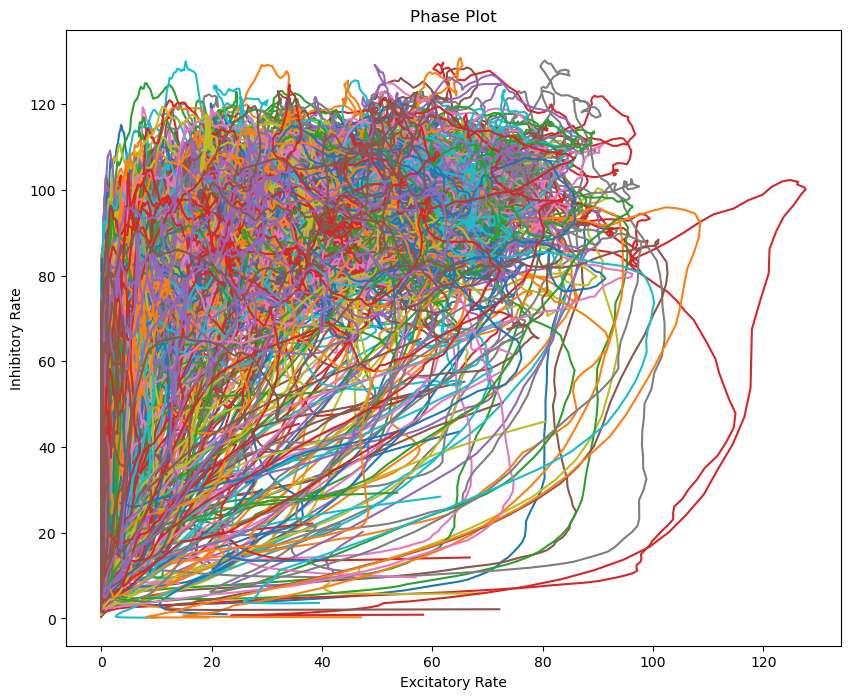

In [95]:
# 1. Phase Plot
plt.figure(figsize=(10, 8))
plt.plot(model['rates_exc'].T, model['rates_inh'].T)
plt.xlabel('Excitatory Rate')
plt.ylabel('Inhibitory Rate')
plt.title('Phase Plot')
plt.show()

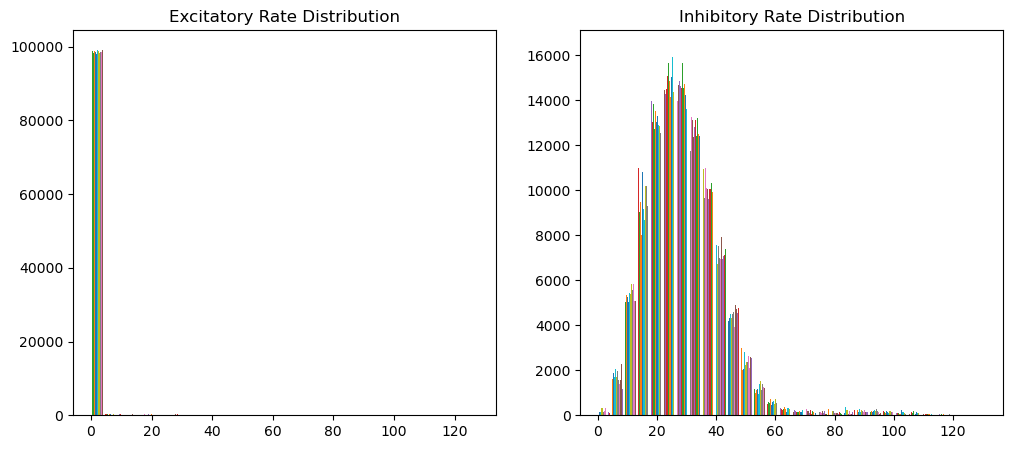

In [96]:
# 2. Histogram of Firing Rates
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.hist(model['rates_exc'].T, bins=30)
plt.title('Excitatory Rate Distribution')
plt.subplot(122)
plt.hist(model['rates_inh'].T, bins=30)
plt.title('Inhibitory Rate Distribution')
plt.show()

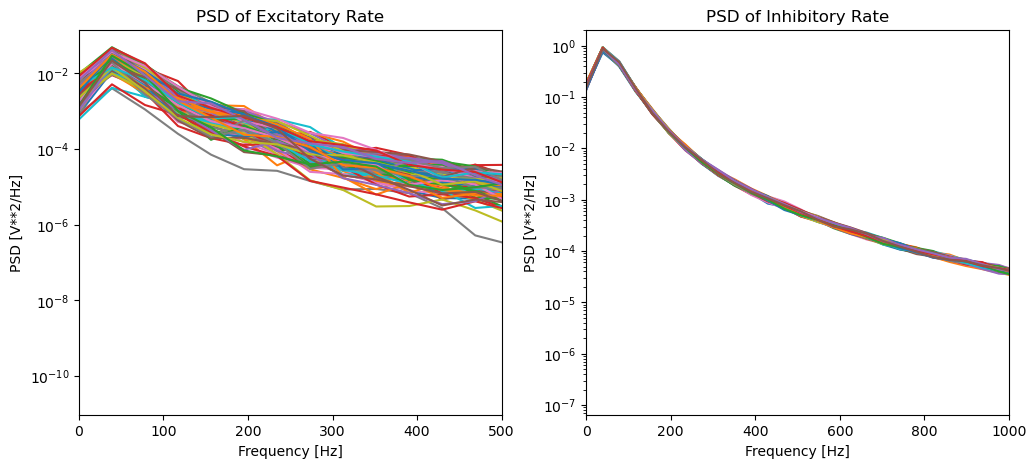

In [97]:
# 5. Power Spectral Density
f_exc, psd_exc = signal.welch(model['rates_exc'], fs=1000/model.params.dt)
f_inh, psd_inh = signal.welch(model['rates_inh'], fs=1000/model.params.dt)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.semilogy((f_exc), psd_exc.T)
plt.title('PSD of Excitatory Rate')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(0, 500)

plt.subplot(122)
plt.semilogy(f_inh, psd_inh.T)
plt.title('PSD of Inhibitory Rate')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim(0, 1000)

plt.show()

# Model fitting

In [98]:
# Load empirical data

fc_file = "/Users/fdjim/Desktop/Projects/neurolib/data/sub-0001/fc/0001_1_RestEmpCorrFC.csv"

fc = np.loadtxt(fc_file, delimiter=',')

In [99]:
from neurolib.utils.functions import fc


weights_file = "/Users/fdjim/Desktop/Projects/neurolib/data/sub-0001/sc/0001_1_Counts.csv"
length_file = "/Users/fdjim/Desktop/Projects/neurolib/data/sub-0001/sc/0001_1_Lengths.csv" 

weights = np.loadtxt(weights_file, delimiter=',')
length = np.loadtxt(length_file, delimiter=',')

# Normalize each connectome matrix
normalized_weights = weights / np.max(weights)
normalized_length = length / np.max(length)

model = ALNModel(Cmat=normalized_weights, Dmat=normalized_length)


In [100]:
# Resting state fits
model.params['mue_ext_mean'] = 1.289
model.params['mui_ext_mean'] = 2.805
model.params['sigma_ou'] = 0.023
model.params['b'] = 9.418
model.params['a'] = 4.058
model.params['duration'] = 60 * 1000 #ms
# testing: aln.params['duration'] = 0.2 * 60 * 1000 #ms
# real: aln.params['duration'] = 1.0 * 60 * 1000 #ms


